# Investment Growth Prediction Model

## 1. Objective
The objective of this notebook is to build a machine learning model that predicts the future growth of an investment based on historical market and economic indicators. This model will be used to estimate projected returns for user-selected investment horizons.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## 2. Load Market Dataset
The financial and economic dataset is loaded to analyze historical trends and prepare features for growth prediction.

In [4]:
df_market = pd.read_csv(r"C:\Users\SHANKHY\OneDrive\Desktop\finance_economics_dataset.csv")
df_market.head(2)

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101


## 3. Data Preparation
The dataset is cleaned, relevant numerical features are selected, and the target variable is defined as the stock closing price.

In [5]:
df_market['Date'] = pd.to_datetime(df_market['Date'])
df_market = df_market.sort_values('Date')

target = 'Close Price'

features = df_market.select_dtypes(include=np.number).drop(columns=[target])
X = features
y = df_market[target]

## 4. Train-Test Split
The dataset is split into training and testing sets to evaluate model performance on unseen data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

## 5. Feature Scaling
Scaling is applied to improve model stability and performance.

In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Baseline Model: Linear Regression
A linear regression model is trained as a baseline to establish reference performance.

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

## 7. Advanced Model: Random Forest Regressor
A Random Forest model is trained to capture non-linear relationships in the data.

In [9]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## 8. Model Evaluation
Model performance is evaluated using standard regression metrics.

In [11]:
def evaluate_model(y_true, y_pred, name):
    print(f"{name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred) ** 0.5)
    print("R2:", r2_score(y_true, y_pred))
    print("-" * 30)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression
MAE: 13.543261365023906
RMSE: 16.750544365805474
R2: 0.9997900149194751
------------------------------
Random Forest
MAE: 16.12984950000004
RMSE: 20.032171819817524
R2: 0.9996996783361792
------------------------------


## 9. Prediction Visualization
The predicted values are compared against actual values to visually assess model performance.

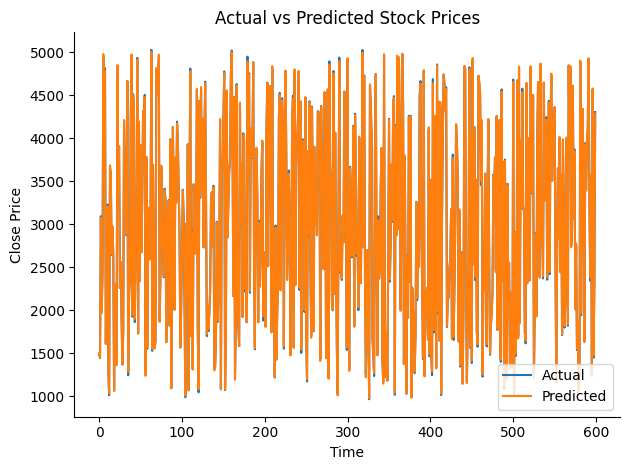

In [12]:
fig, ax = plt.subplots()

ax.plot(y_test.values, label="Actual")
ax.plot(y_pred_rf, label="Predicted")

ax.set_title("Actual vs Predicted Stock Prices")
ax.set_xlabel("Time")
ax.set_ylabel("Close Price")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend()

plt.tight_layout()
plt.show()

## 10. Saving the Trained Model
The trained prediction model and scaler are saved for integration into the deployed application.

In [15]:
joblib.dump(rf_model, "models/growth_prediction_model.pkl")
joblib.dump(scaler, "models/growth_scaler.pkl")

['models/growth_scaler.pkl']

## 11. Summary
This notebook implemented a market-based investment growth prediction model. The trained model enables estimation of future investment value and will be used to generate projected growth visualizations in the deployed application.